<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/sklearn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the data


Original Data Source from Trevor Hastie's LARS software page via Standford University Department of Statistics:
[Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)

**Brief Description**

From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) [*Least Angle Regression*](https://https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf), Annals of Statistics (with discussion), 407-499, we have:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients and quantitative measure of disease progression one year after baseline"

The included variables are:
* age: Age of the patient
* sex: Sex of the patient
* bmi: Body mass index
* bp: Blood pressure
* s1: Total serum cholesterol (tc)
* s2: Low-density lipoproteins (ldl)
* s3: High-density lipoproteins (hdl)
* s4: tc / hdl (tch)
* s5: Log of serum triglycerides level (ltg)
* s6: Blood sugar level (glu)
* target: measure of disease progression one year after baseline


In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = load_diabetes(as_frame=True)
df = data.frame
df.head()
df.info() # check null vales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
print(df['age'].describe())
print(df['age'].nunique())
print(df['age'].mode())

count    4.420000e+02
mean    -2.511817e-19
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64
58
0    0.016281
Name: age, dtype: float64


In [ ]:
sns.distplot(df['age']) # Visualise distribution of ages
#plt.show()
df.sex.unique()

In [1]:
conditions = [
    (df['sex'] < 0),
    (df['sex'] > 0)
]
choices = ['Male', 'Female']
df['sex'] = np.select(conditions, choices, default='Unknown')

print(df)

NameError: name 'df' is not defined

In [ ]:
print(diabetes_df.describe())

                age           bmi            bp            s1            s2  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19 -2.245564e-16 -4.797570e-17 -1.381499e-17  3.918434e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -9.027530e-02 -1.123988e-01 -1.267807e-01 -1.156131e-01   
25%   -3.729927e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02 -3.035840e-02   
50%    5.383060e-03 -7.283766e-03 -5.670422e-03 -4.320866e-03 -3.819065e-03   
75%    3.807591e-02  3.124802e-02  3.564379e-02  2.835801e-02  2.984439e-02   
max    1.107267e-01  1.705552e-01  1.320436e-01  1.539137e-01  1.987880e-01   

                 s3            s4            s5            s6      target  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  
mean  -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  152.133484  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

In [ ]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    object 
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(10), object(1)
memory usage: 38.1+ KB
None


In [ ]:
print(diabetes_df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [ ]:
print(diabetes_df.duplicated().sum())

0


# Plot the data

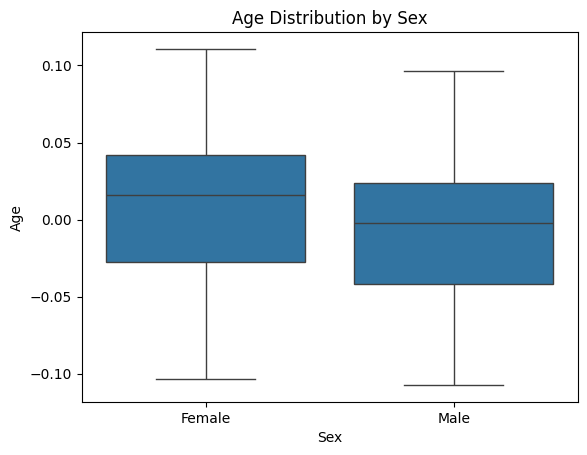

In [ ]:
sns.boxplot(data=diabetes_df, x='sex', y='age')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

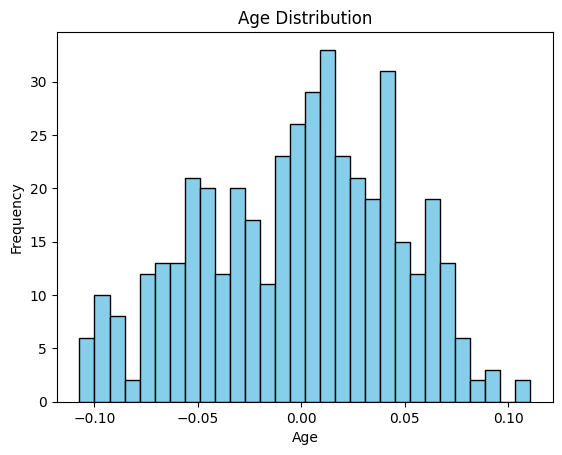

In [ ]:
# Histogram of Age
plt.hist(diabetes_df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


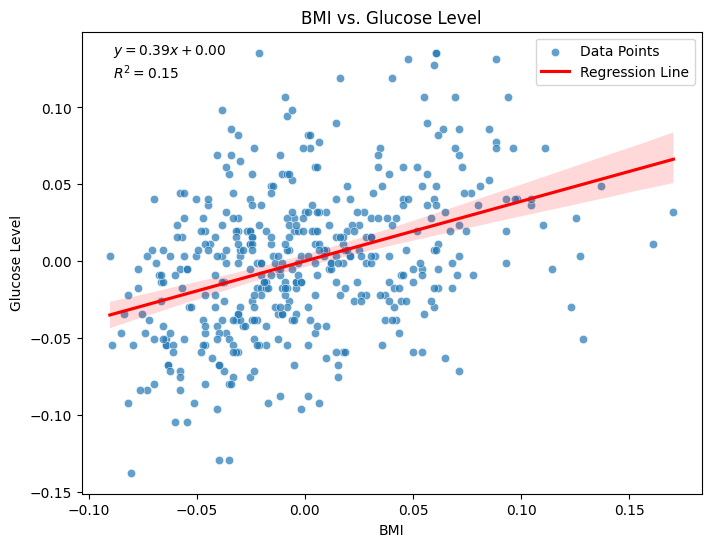

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(diabetes_df['bmi'], diabetes_df['s6'])


# Scatter plot of BMI vs. Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diabetes_df, x='bmi', y='s6', label='Data Points', alpha=0.7)
sns.regplot(x='bmi', y='s6', data=diabetes_df, scatter=False, color='red', label='Regression Line')

# Annotate with the equation and R^2 value
plt.annotate(
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
    xy=(x_min + (x_max - x_min) * 0.05, y_max - (y_max - y_min) * 0.1)
)

# Show the plot
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.legend()
plt.show()

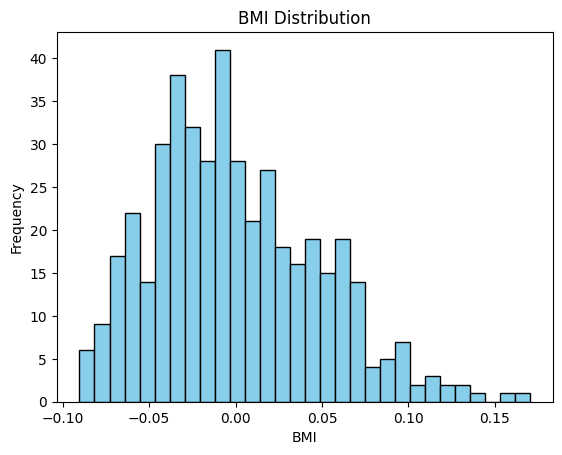

In [ ]:
# Histogram of BMI
plt.hist(diabetes_df['bmi'], bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


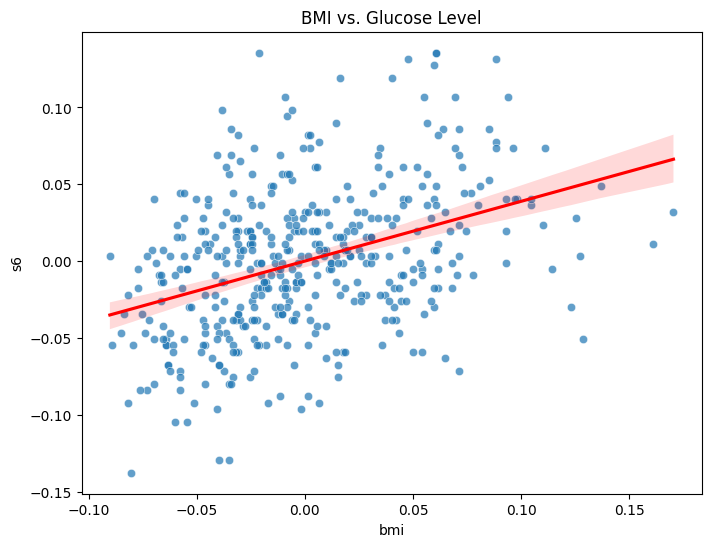

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(diabetes_df['bmi'], diabetes_df['s6'])

# Scatter plot of BMI vs. Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diabetes_df, x='bmi', y='s6', alpha=0.7)
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')

# Add regression line
sns.regplot(x='bmi', y='s6', data=diabetes_df, scatter=False, color='red', label='Regression Line')

# Get plot limits to position annotation dynamically
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Annotate with the equation and R^2 value
plt.annotate(
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
    xy=(5,8), xycoords='data',  # 5% from left, 10% from top
)

# Show the plot
plt.show()


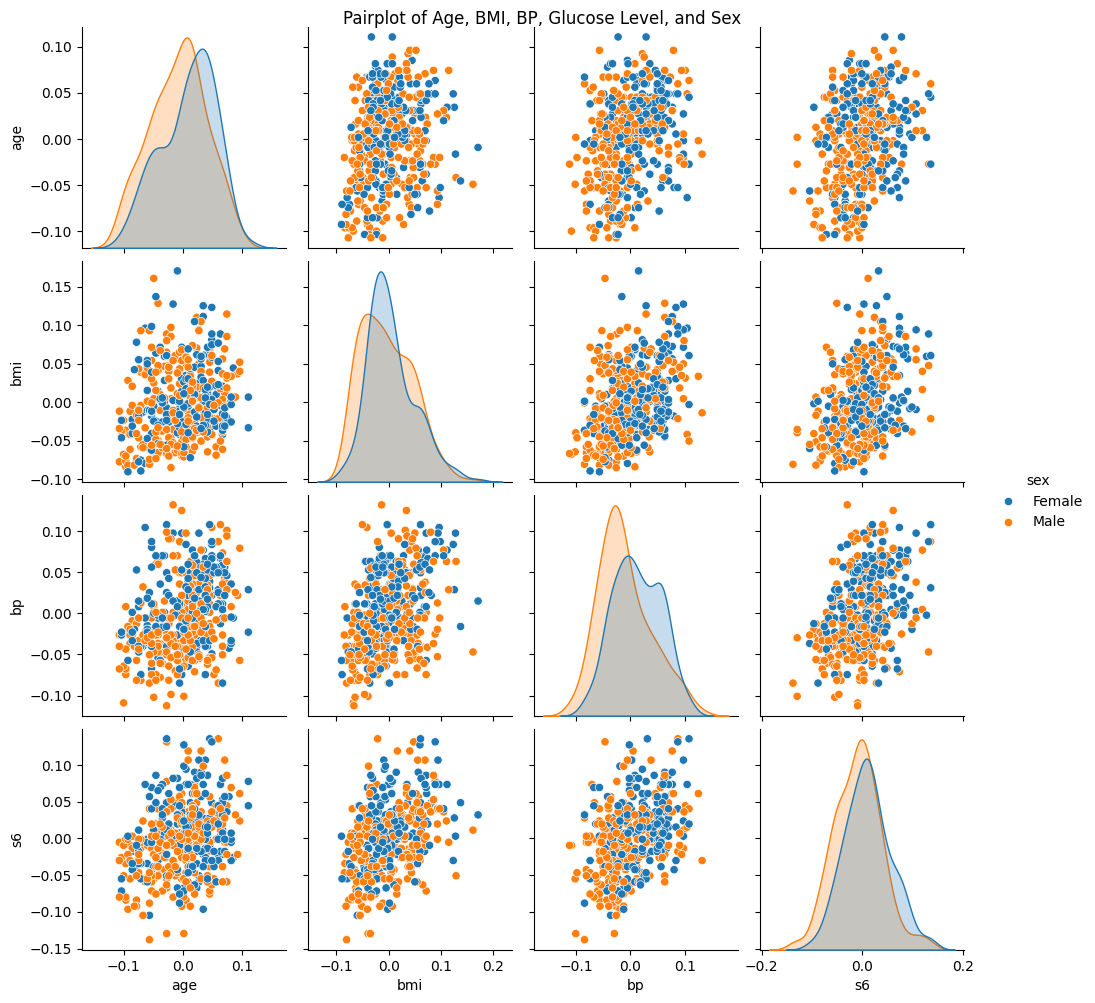

In [ ]:
# Pairplot of selected features
sns.pairplot(diabetes_df[['age', 'bmi', 'bp', 's6', 'sex']], hue='sex')
plt.suptitle('Pairplot of Age, BMI, BP, Glucose Level, and Sex', y=1.0)
plt.show()


In [ ]:
# Ensure 'duration' is numeric (handle any non-numeric entries)
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')

# Filter for movies released in the 1990s
movies_1990s = netflix_df[
    (netflix_df['type'] == 'Movie') &
    (netflix_df['release_year'] >= 1990) &
    (netflix_df['release_year'] < 2000)
]

# Find the most frequent movie duration in the 1990s
most_frequent_duration = movies_1990s['duration'].mode()[0]
duration = int(most_frequent_duration)  # Save as an integer

# Filter for short action movies (<90 minutes) released in the 1990s
short_action_movies_1990s = movies_1990s[
    (movies_1990s['genre'] == 'Action') &
    (movies_1990s['duration'] < 90)
]

# Count the number of short action movies using .count()
short_movie_count = short_action_movies_1990s['genre'].count()


# Print the results
print(f"The most frequent movie duration in the 1990s is: {duration} minutes")
print(f"The number of short action movies released in the 1990s is: {short_movie_count}")